# Tugas Computer Vision - Kernel dan Feature Detection

## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Save as... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: Yusuf Tis'a Doni
### NIM: A710190084


In [1]:
from time import ctime
from os import getcwd
import sys
nama = "Yusuf Tis'a Doni"     ## Ganti dengan namamu
NIM = "A710190084"     ## Ganti dengan NIM-mu
kota = "Surakarta"     ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: Yusuf Tis'a Doni
NIM : A710190084
Kota: Surakarta
Thu Jun 16 15:03:00 2022

C:\Users\dynam\OneDrive - thapar institute of engineering & technology\Documents\Kuliah\Kuliah\Semester 6\Computer Vision\stelah uts ke 3\Feature_Detection
C:\Users\dynam\AppData\Local\Programs\Python\Python310\python.exe
3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


##  Import the libraries

In [1]:
## Silakan import semua library yang diperlukan di cell ini
# ...
import cv2
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

1. Memakai kamera atau mengambil dari internet, ambil gambar ikon kotamu, terapkan filter blur 3x3, lalu terapkan pula filter *blur* 15x15. Tampilkan gambar asli bersanding dengan gambar hasil filter.

Text(0.5, 1.0, 'Gambar Blur 15x15')

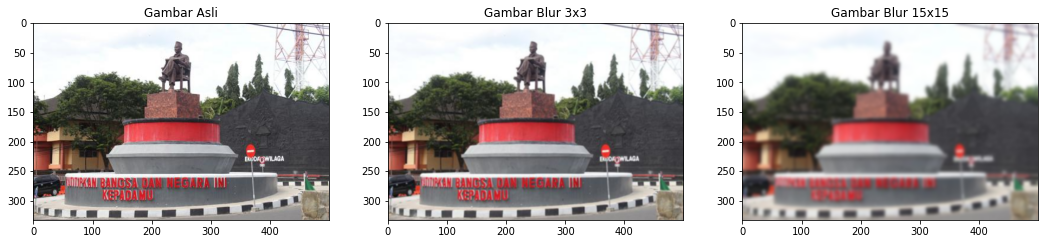

In [2]:
img = cv2.imread("Bundaran-wonogiri.jpg")
blurtugu1 = cv2.GaussianBlur(img, (3,3), 0)
blurtugu2 = cv2.GaussianBlur(img, (15,15), 0)

plt.figure(figsize=[18,10])
plt.subplot(131) ; plt.imshow(img[:,:,::-1]);plt.title("Gambar Asli")
plt.subplot(132) ; plt.imshow(blurtugu1[:,:,::-1]);plt.title("Gambar Blur 3x3")
plt.subplot(133) ; plt.imshow(blurtugu2[:,:,::-1]);plt.title("Gambar Blur 15x15")

2. Memakai kamera atau mengambil dari internet, ambil gambar ikon kotamu, terapkan filter yang membuat *sharp*. Tampilkan gambar asli bersanding dengan gambar hasil filter.

Text(0.5, 1.0, 'Gambar Sharp')

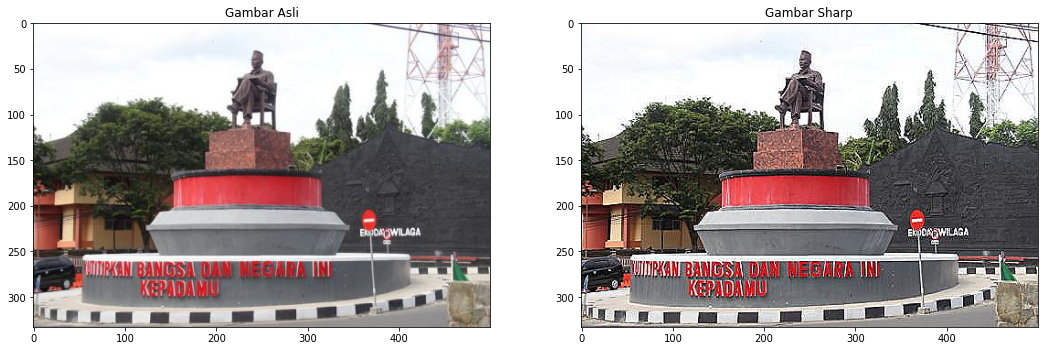

In [3]:
kernel_3 = np.array( [ [ 0, -1,  0 ],
                       [-1,  5,  -1],
                       [ 0, -1,  0 ]  ] )

k3 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_3)
plt.figure(figsize=[18,10])
plt.subplot(121) ; plt.imshow(img[:,:,::-1]);plt.title("Gambar Asli")
plt.subplot(122) ; plt.imshow(k3[:,:,::-1]);plt.title("Gambar Sharp")

3. Memakai kamera atau HP, ambil gambar sebuah tumpukan balok atau tumpukan buku, lalu lakukan sebuah *edge detection* menggunakan filter. Tampilkan gambar asli bersanding dengan gambar hasil filter.

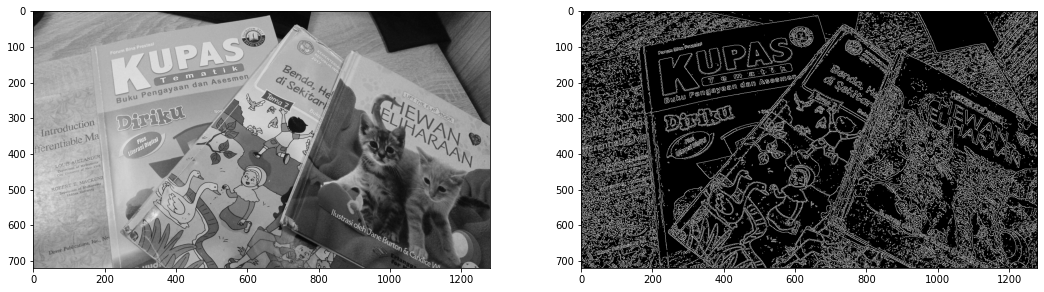

In [7]:
img_buku = cv2.imread("books1.jpg", 0)
imcol = cv2.imread("books1.jpg")
cn = cv2.Canny(img_buku, 35, 40)
plt.figure(figsize=[18,10])
plt.subplot(121) ; plt.imshow(img_buku,cmap='gray');
plt.subplot(122) ; plt.imshow(cn,cmap='gray')

4. Memakai gambar tumpukan balok/buku pada nomer di atas, terapkan *corner detection*.  Tampilkan gambar asli bersanding dengan gambar hasil filter.

Text(0.5, 1.0, 'with corners marked')

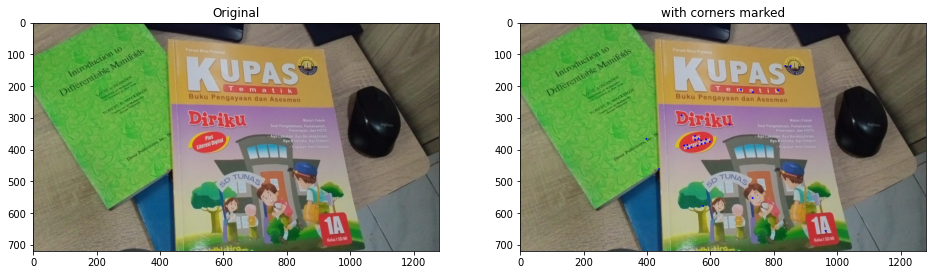

In [12]:
img_buku2 = cv2.imread("books2.jpg")
imgc = img_buku2.copy()
gray = cv2.cvtColor(img_buku2,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(imgc,(x,y),3,255,-1)


plt.figure(figsize=[16,10])
plt.subplot(121); plt.imshow(img_buku2[:,:,::-1],vmin=0, vmax=255);plt.title("Original")
plt.subplot(122); plt.imshow(imgc[:,:,::-1],vmin=0, vmax=255);plt.title("with corners marked")


5. Memakai kamera atau HP, ambil gambar sebuah objek. Lalu ambil gambar objek yang sama dari sudut yang sedikit berbeda dan terdapat benda-benda lain di situ. Lakukan *feature matching* pada kedua gambar itu memakai metode yang ada di video.

500


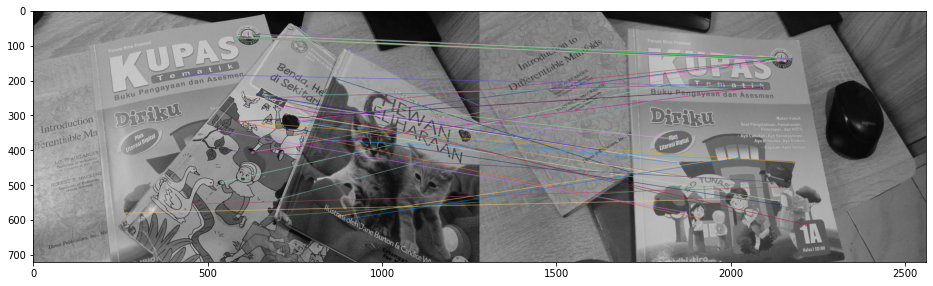

(<matplotlib.image.AxesImage at 0x1246c5544f0>, None)

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('books1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('books2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

print(len(kp1))

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 50 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:50],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=[16,10])
plt.imshow(img3),plt.show()

## Push ke GitHub